In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [3]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [4]:
region_df.tail()

NOC    region        notes
225  YEM     Yemen          NaN
226  YMD     Yemen  South Yemen
227  YUG    Serbia   Yugoslavia
228  ZAM    Zambia          NaN
229  ZIM  Zimbabwe          NaN

In [5]:
df.shape

(271116, 15)

### Performing analysis on Summer olympics only.

In [6]:
df = df[df['Season']== 'Summer']

In [7]:
df.shape

(222552, 15)

In [8]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
271106      Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107  United States  USA  1972 Summer  1972  Summer          Munich   
271108         Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109         Russia  RUS  2004 Summer  2004  Summer          Athina   
271110        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN

### Merging athlete data with region data

In [9]:
df=df.merge(region_df, on='NOC', how='left')

In [10]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [11]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [12]:
# Finding missing values in each column

df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
df[(df['region'].isnull()) & df['NOC']]

ID                             Name Sex   Age  Height  Weight  \
509        332                 Zarinah Abdullah   F  21.0     NaN     NaN   
510        332                 Zarinah Abdullah   F  25.0     NaN     NaN   
2362      1515  Saiyidah Aisyah Mohamed Rafa'ee   F  28.0   173.0    68.0   
5523      3515              Paulo Amotun Lokoro   M  24.0   170.0    61.0   
6652      4264                   Ang Peng Siong   M  21.0   180.0    75.0   
...        ...                              ...  ..   ...     ...     ...   
220770  134454                    Zhang Guirong   F  26.0   182.0    95.0   
220771  134454                    Zhang Guirong   F  30.0   182.0    95.0   
220972  134587                    Zhang Xueling   F  21.0   163.0    53.0   
220973  134587                    Zhang Xueling   F  21.0   163.0    53.0   
221349  134826                       Zhou Yihan   F  22.0   168.0    54.0   

                            Team  NOC        Games  Year  Season  \
509                    Singapore  SGP  1992 Summer  1992  Summer   
510                    Singapore  SGP  1996 Summer  1996  Summer   
2362                   Singapore  SGP  2016 Summer  2016  Summer   
5523    Refugee Olympic Athletes  ROT  2016 Summer  2016  Summer   
6652                   Singapore  SGP  1984 Summer  1984  Summer   
...                          ...  ...          ...   ...     ...   
220770                 Singapore  SGP  2004 Summer  2004  Summer   
220771                 Singapore  SGP  2008 Summer  2008  Summer   
220972                 Singapore  SGP  2004 Summer  2004  Summer   
220973               Singapore-1  SGP  2004 Summer  2004  Summer   
221349                 Singapore  SGP  2016 Summer  2016  Summer   

                  City         Sport                                Event  \
509          Barcelona     Badminton            Badminton Women's Singles   
510            Atlanta     Badminton            Badminton Women's Singles   
2362    Rio de Janeiro        Rowing         Rowing Women's Single Sculls   
5523    Rio de Janeiro     Athletics         Athletics Men's 1,500 metres   
6652       Los Angeles      Swimming  Swimming Men's 100 metres Freestyle   
...                ...           ...                                  ...   
220770          Athina     Athletics           Athletics Women's Shot Put   
220771         Beijing     Athletics           Athletics Women's Shot Put   
220972          Athina  Table Tennis         Table Tennis Women's Singles   
220973          Athina  Table Tennis         Table Tennis Women's Doubles   
221349  Rio de Janeiro  Table Tennis            Table Tennis Women's Team   

       Medal region                 notes  
509      NaN    NaN                   NaN  
510      NaN    NaN                   NaN  
2362     NaN    NaN                   NaN  
5523     NaN    NaN  Refugee Olympic Team  
6652     NaN    NaN                   NaN  
...      ...    ...                   ...  
220770   NaN    NaN                   NaN  
220771   NaN    NaN                   NaN  
220972   NaN    NaN                   NaN  
220973   NaN    NaN                   NaN  
221349   NaN    NaN                   NaN  

[370 rows x 17 columns]

#### Observation

* Age, Height, Weight, Medal, region, notes have missing values.
* Since region has some missing values we can perform analysis on the basis of NOC.

### Eliminating duplicate rows

In [14]:
df.duplicated().sum()

1385

In [15]:
df.drop_duplicates(inplace = True)

In [16]:
df.duplicated().sum()

0

### Performing One Hot Encoding on 'Medal' column

In [17]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [18]:
df=pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [19]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  Bronze  Gold  Silver  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0

### Grouping 'NOC' with medal column

In [20]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index().head(25)

NOC    Gold  Silver  Bronze
0   USA  2472.0  1333.0  1197.0
1   URS   832.0   635.0   596.0
2   GBR   635.0   729.0   620.0
3   GER   592.0   538.0   649.0
4   ITA   518.0   474.0   454.0
5   FRA   463.0   567.0   587.0
6   HUN   432.0   328.0   363.0
7   SWE   354.0   396.0   358.0
8   AUS   342.0   452.0   510.0
9   GDR   339.0   277.0   227.0
10  CHN   334.0   317.0   258.0
11  RUS   296.0   278.0   331.0
12  NED   245.0   302.0   371.0
13  JPN   230.0   287.0   333.0
14  NOR   227.0   196.0   167.0
15  DEN   179.0   236.0   177.0
16  KOR   171.0   206.0   175.0
17  CUB   164.0   129.0   116.0
18  ROU   161.0   200.0   290.0
19  CAN   158.0   239.0   344.0
20  FRG   144.0   172.0   188.0
21  FIN   132.0   125.0   217.0
22  IND   131.0    19.0    40.0
23  YUG   130.0   161.0    92.0
24  POL   111.0   185.0   242.0

#### Observation 
* The medal tally of a country is very high compared to real medal tally obtained.
* Since the data given is of each athlete, the medal tally of a team event is distributed to every player and not counted as one medal of the team for that country.

In [21]:
# Example
df[(df['NOC']=='IND') & (df['Medal']=='Gold')]

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN       0     1       0  
4190    Gold  India   NaN       0     1       0  
4460    Gold  India   NaN       0     1       0  
4461    Gold  India   NaN       0     1       0  
4462    Gold  India   NaN       0     1       0  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN       0     1       0  
193964  Gold  India   NaN       0     1       0  
193965  Gold  India   NaN       0     1       0  
205949  Gold  India   NaN       0     1       0  
219336  Gold  India   NaN       0     1       0  

[131 rows x 20 columns]

## Medal Tally

 * Overall Tally
 * Medal tally of overall country in particular year.
 * Medal tally of particular country in overall year.
 * Medal tally of particular country in particular year.

#### To solve this problem we will remove duplicate rows on the basis of  'Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'.

In [22]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [23]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index()
medal_tally

region    Gold  Silver  Bronze
0              USA  1035.0   802.0   708.0
1           Russia   592.0   498.0   487.0
2          Germany   444.0   457.0   491.0
3               UK   278.0   317.0   300.0
4           France   234.0   256.0   287.0
..             ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0

[205 rows x 4 columns]

In [24]:
#Verifying medal tally of India
medal_tally[medal_tally['region']=='India']

region  Gold  Silver  Bronze
46  India   9.0     7.0    12.0

In [25]:
medal_tally['total'] = medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [26]:
medal_tally

region    Gold  Silver  Bronze   total
0              USA  1035.0   802.0   708.0  2545.0
1           Russia   592.0   498.0   487.0  1577.0
2          Germany   444.0   457.0   491.0  1392.0
3               UK   278.0   317.0   300.0   895.0
4           France   234.0   256.0   287.0   777.0
..             ...     ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0     0.0

[205 rows x 5 columns]

### Olympic years

In [27]:
years = df['Year'].unique().tolist()

In [28]:
years.sort()

In [29]:
years.insert(0,'Overall')

In [30]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

### Olympic countries

In [31]:
countries = np.unique(df['region'].dropna().values).tolist()
#Since there are few Nan values we drop those values

In [32]:
countries.sort()

In [33]:
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [34]:
countries.insert(0,'Overall')

In [35]:
countries

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [36]:
# Creating function to fetch year, country wise data

def fetch_medal_tally(df,year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

    flag=0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag =1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region']== country)]
    
    if flag == 1:
        x= temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x= temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold', ascending=False).reset_index()
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
    
    print(x)

In [37]:
fetch_medal_tally(df,year='Overall', country='Overall')

            region    Gold  Silver  Bronze   total
0              USA  1035.0   802.0   708.0  2545.0
1           Russia   592.0   498.0   487.0  1577.0
2          Germany   444.0   457.0   491.0  1392.0
3               UK   278.0   317.0   300.0   895.0
4           France   234.0   256.0   287.0   777.0
..             ...     ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0     0.0

[205 rows x 5 columns]


In [38]:
fetch_medal_tally(df,year='Overall', country ='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


In [39]:
fetch_medal_tally(df,year=1912, country='Overall')

            region  Gold  Silver  Bronze  total
0              USA    26      18      19     63
1           Sweden    24      24      17     65
2               UK    10      15      16     41
3          Finland     9       8       9     26
4           France     7       5       3     15
5          Germany     6      13       7     26
6            Italy     5       1       2      8
7     South Africa     4       2       0      6
8           Norway     4       1       5     10
9          Hungary     3       2       3      8
10          Canada     3       2       3      8
11       Australia     2       2       3      7
12         Belgium     2       1       3      6
13          Greece     1       0       1      2
14         Denmark     1       6       5     12
15     Switzerland     1       0       0      1
16         Iceland     0       0       0      0
17         Austria     0       2       2      4
18      Luxembourg     0       0       0      0
19     Netherlands     0       0       3

In [40]:
fetch_medal_tally(df,year=1960, country='India')

  region  Gold  Silver  Bronze  total
0  India     0       1       0      1


## Overall Analysis

 * No of editions
 * No of cities
 * No of events/sport
 * No of athletes
 * Participating nations

In [41]:
# No of editions of olympics
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1932, 1952, 2000, 1996, 1912, 1924, 1948,
       2008, 2016, 2004, 1984, 1968, 1972, 1988, 1936, 1956, 1960, 1928,
       1976, 1980, 1964, 1906, 1904, 1908, 1896], dtype=int64)

In [42]:
df['Year'].unique().shape

(29,)

#### Oberservation

Total official count of the olympics are 28. The 1906 olympics called as 'Intercalated Games' is not recognized by the International Olympic Committee as more stress was placed on continuing sequence of four-years Olympiads. 

In [43]:
df['Year'].unique().shape[0]-1

28

In [44]:
# Number of cities olympics was played.
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [45]:
df['City'].unique().shape

(23,)

In [46]:
# Number of Event/Sports
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [47]:
df['Sport'].unique().shape

(52,)

In [48]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [49]:
df['Event'].unique().shape

(651,)

In [50]:
#Number of athletes
df['Name'].unique().shape

(116122,)

In [51]:
df['region'].unique().shape

(206,)

In [52]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [53]:
nations_over_time.rename(columns={'index':'Editions', 'Year':'No of countries'}, inplace=True)

In [54]:
nations_over_time

Editions  No of countries
28      1896               12
22      1900               31
27      1904               14
26      1906               20
25      1908               22
24      1912               29
23      1920               29
21      1924               45
20      1928               46
19      1932               47
18      1936               49
17      1948               59
16      1952               67
15      1956               71
13      1960               83
11      1964               93
10      1968              111
9       1972              120
12      1976               91
14      1980               80
8       1984              139
7       1988              156
6       1992              168
5       1996              196
4       2000              199
3       2004              200
2       2008              202
1       2012              203
0       2016              204

In [55]:
import plotly.express as px

In [56]:
fig = px.line(nations_over_time, x="Editions", y="No of countries")
fig.show()

#### Observation
 * There is a dip in participating countries in olympics in 1904 and 1980. 
 * In 1904 tensions caused by the Russo–Japanese War, and the difficulties of getting to St. Louis in 1904, contributed to very    few top-class athletes from outside the US and Canada taking part in the Games. 
 * In 1980 led by the United States, 66 countries boycotted the games entirely, because of the Soviet–Afghan War.

In [57]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')

index  Year
28   1896    43
26   1900    90
25   1904    95
27   1906    74
23   1908   109
24   1912   107
14   1920   158
21   1924   131
22   1928   122
20   1932   131
17   1936   150
15   1948   153
19   1952   149
16   1956   151
18   1960   150
13   1964   163
12   1968   172
11   1972   193
10   1976   198
9    1980   203
8    1984   221
7    1988   237
6    1992   257
5    1996   271
4    2000   300
3    2004   301
2    2008   302
1    2012   302
0    2016   306

In [58]:
import seaborn as sns

In [59]:
x= df.drop_duplicates(['Year', 'Sport','Event'])

<AxesSubplot:xlabel='Year', ylabel='Sport'>

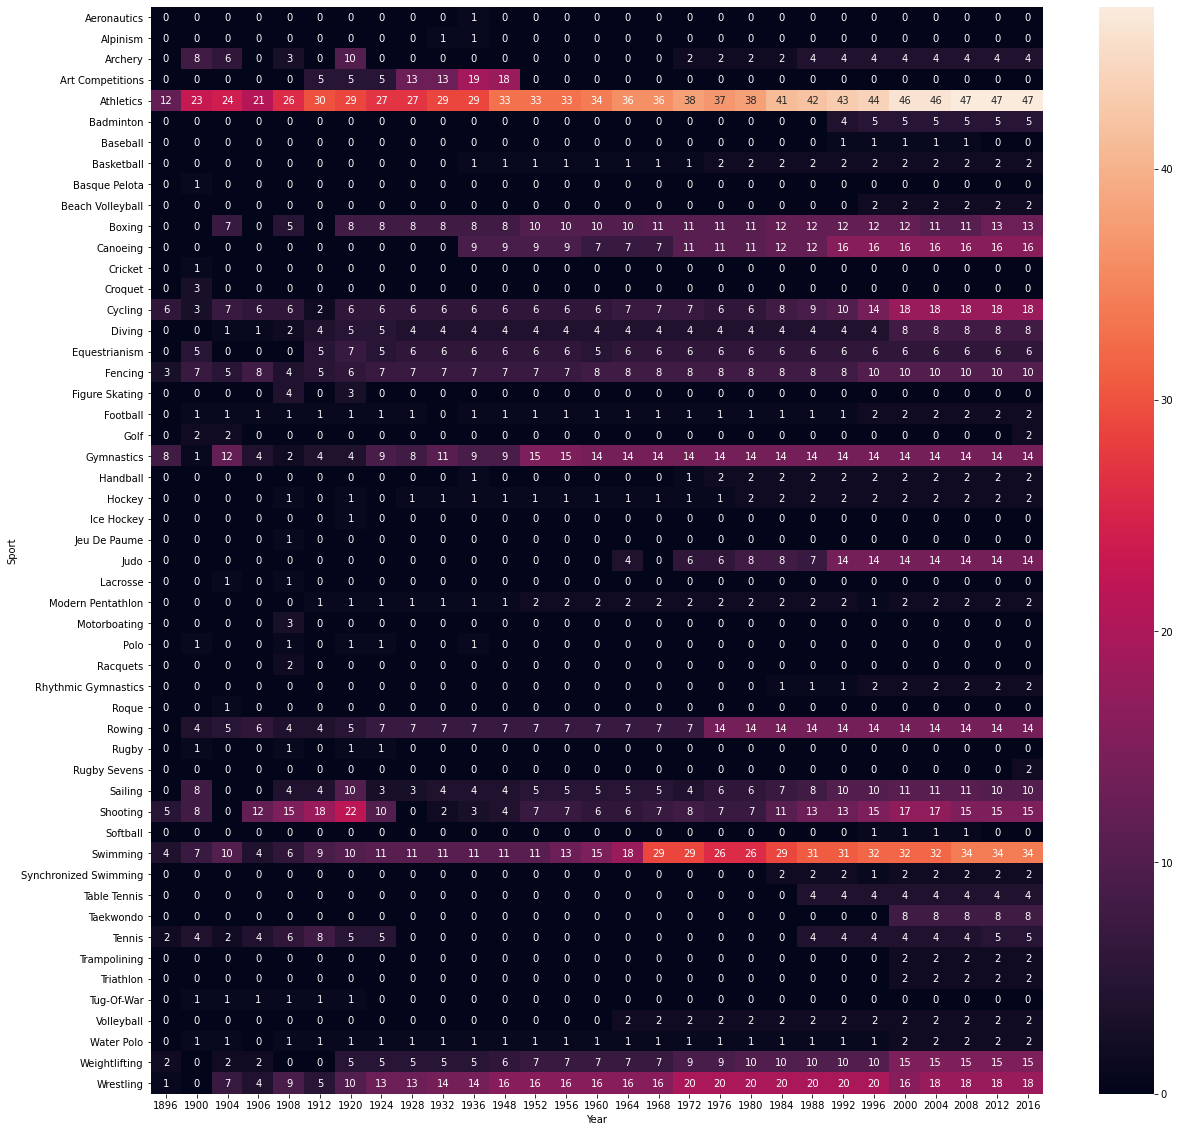

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'), annot=True)

In [61]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if sport!= 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index':'Name', 'Name_x':'Medals'}, inplace=True)
    return x

In [62]:
most_successful(df,'Gymnastics')

Name  Medals       Sport  \
0          Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
19               Nikolay Yefimovich Andrianov      15  Gymnastics   
43                Borys Anfiyanovych Shakhlin      13  Gymnastics   
67                                Takashi Ono      13  Gymnastics   
100                   Aleksey Yuryevich Nemov      12  Gymnastics   
121                                Sawao Kato      12  Gymnastics   
145                    Vra slavsk (-Odloilov)      11  Gymnastics   
163                 Viktor Ivanovych Chukarin      11  Gymnastics   
179                 gnes Keleti-Srkny (Klein)      10  Gymnastics   
193           Aleksandr Nikolayevich Dityatin      10  Gymnastics   
209                          Akinori Nakayama      10  Gymnastics   
225             Vitaly Venediktovich Shcherbo      10  Gymnastics   
241               Polina Hryhorivna Astakhova      10  Gymnastics   
260  Lyudmila Ivanovna Turishcheva (-Borzova)       9  Gymnastics   
278             Nadia Elena Comneci (-Conner)       9  Gymnastics   

             region  
0            Russia  
19           Russia  
43           Russia  
67            Japan  
100          Russia  
121           Japan  
145  Czech Republic  
163          Russia  
179         Hungary  
193          Russia  
209           Japan  
225          Russia  
241          Russia  
260          Russia  
278         Romania

## Country-wise analysis
 * Country-wise medal tally per year(line plot)
 * What countries are good(heatmap).
 * Most successfull atheletes(Top 10).

In [63]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

<ipython-input-63-80e71f71bc81>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
new_df = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [65]:
fig = px.line(final_df, x="Year", y="Medal")
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

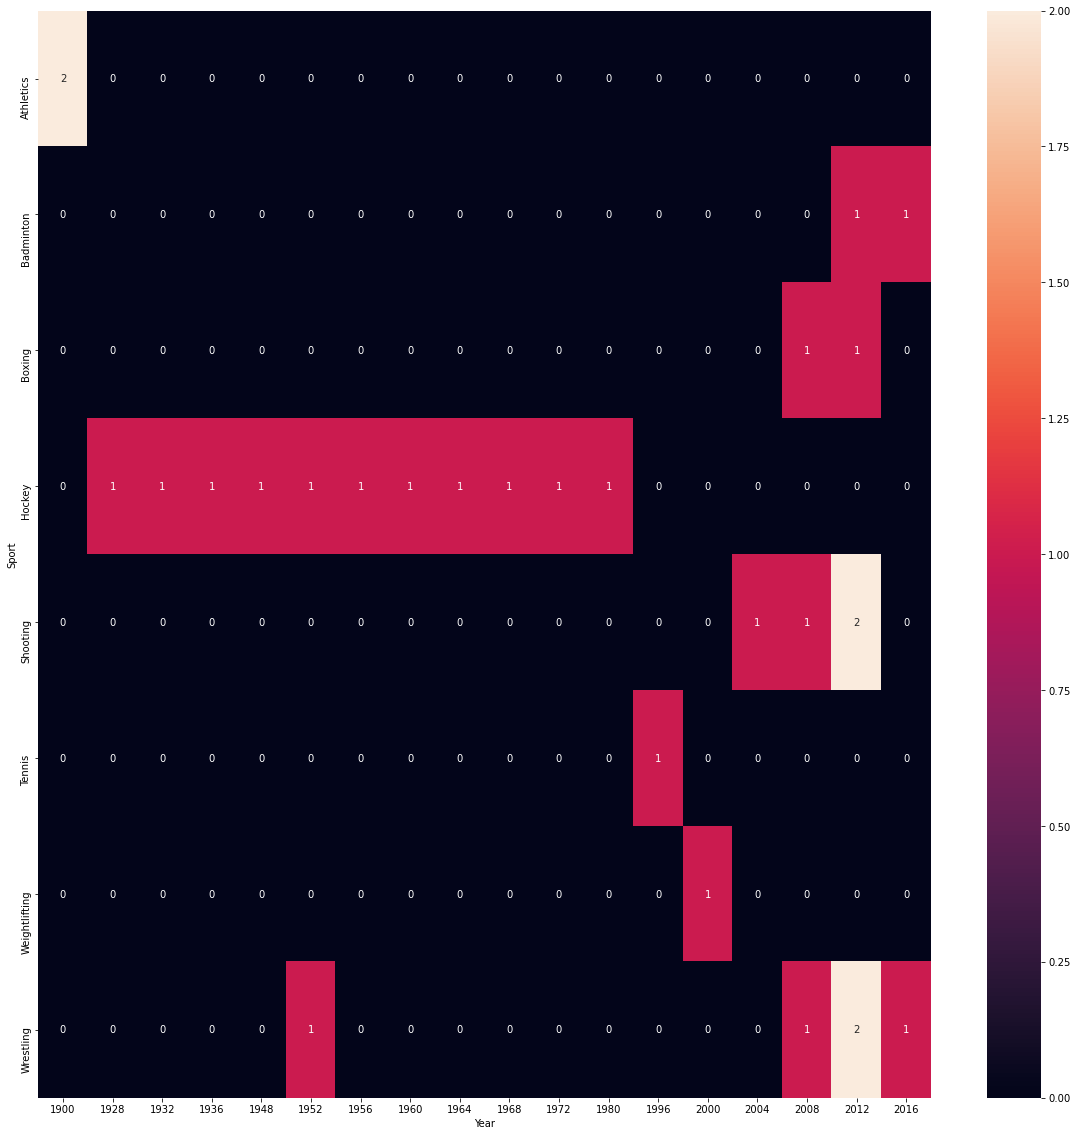

In [66]:
new_df = temp_df[temp_df['region'] == 'India']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc= 'count').fillna(0), annot=True)

In [67]:
def most_successful(df,country):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region'] == country]
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name', 'Name_x':'Medals'}, inplace=True)
    return x

In [68]:
most_successful(df, 'India')

Name  Medals   Sport
0      Leslie Walter Claudius       4  Hockey
4           Udham Singh Kular       4  Hockey
8   Victor John "V. J." Peter       3  Hockey
11     Harbinder Singh Chimni       3  Hockey
14           Dhyan Chand Bais       3  Hockey
17       Randhir Singh Gentle       3  Hockey
20        Ranganathan Francis       3  Hockey
23               Balbir Singh       3  Hockey
26  Balbir Singh Dosanjh, Sr.       3  Hockey
29        Richard James Allen       3  Hockey
32      Shankar Pillay Laxman       3  Hockey
35            Prithipal Singh       3  Hockey
38             Govind Perumal       2  Hockey
40               Gurbux Singh       2  Hockey
42        Keshav Chandra Dutt       2  Hockey

In [69]:
import plotly.figure_factory as ff

In [70]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

In [71]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [72]:
fig = ff.create_distplot([x1,x2,x3,x4], ['Overall Age', 'Gold Medallist', 'Silver Medallist', 'Bronze Medallist'], show_hist = False , show_rug=False)
fig.show()

In [73]:
famous_sport = ['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']
famous_sport

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

In [74]:
x=[]
name=[]
for sport in famous_sport:
    temp_df = athlete_df[athlete_df['Sport']== sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

In [75]:
athlete_df['Medal'].fillna('No Medal', inplace=True)
athlete_df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222544  135563           Olesya Nikolayevna Zykina   F  19.0   171.0    64.0   
222546  135565            Fernando scar Zylberberg   M  23.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222544          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222546       Argentina  ARG  2000 Summer  2000  Summer          Sydney   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event     Medal  \
0       Basketball             Basketball Men's Basketball  No Medal   
1             Judo            Judo Men's Extra-Lightweight  No Medal   
2         Football                 Football Men's Football  No Medal   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War      Gold   
4        Athletics            Athletics Women's 100 metres  No Medal   
...            ...                                     ...       ...   
222544   Athletics  Athletics Women's 4 x 400 metres Relay    Bronze   
222546      Hockey                     Hockey Men's Hockey  No Medal   
222548    Football                 Football Men's Football  No Medal   
222549      Rowing  Rowing Men's Lightweight Coxless Fours  No Medal   
222551  Basketball           Basketball Women's Basketball  No Medal   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222544       Russia   NaN       1     0       0  
222546    Argentina   NaN       0     0       0  
222548          USA   NaN       0     0       0  
222549       Russia   NaN       0     0       0  
222551      Belarus   NaN       0     0       0  

[116885 rows x 20 columns]

C:\Users\yjynj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

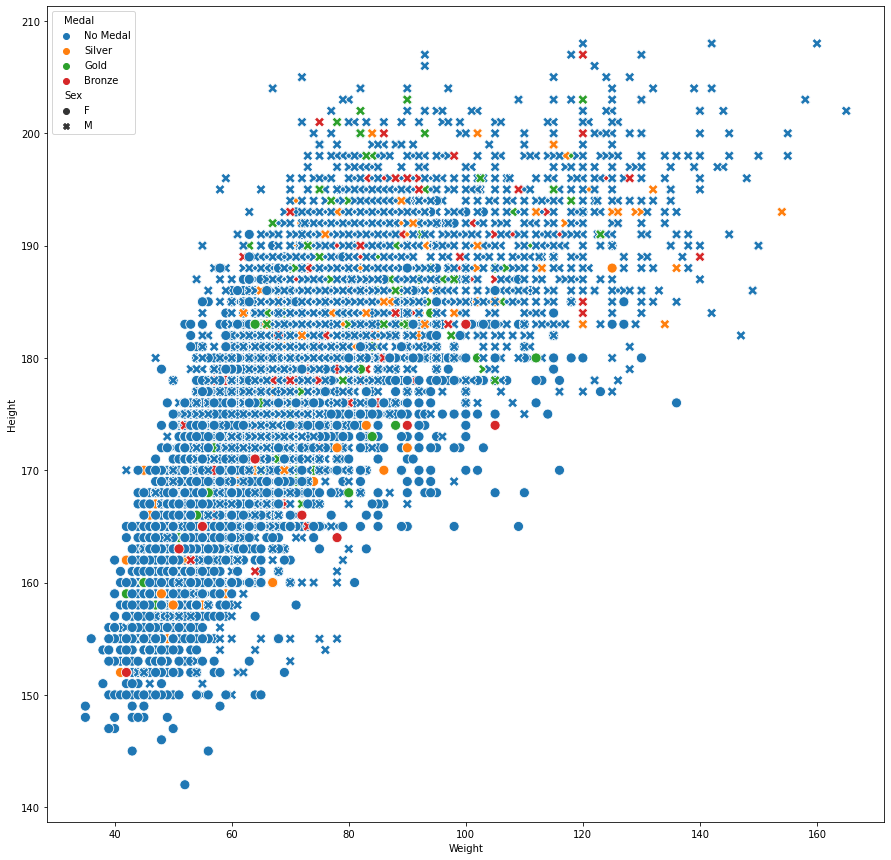

In [76]:
plt.figure(figsize=(15,15))
temp_df= athlete_df[athlete_df['Sport']=='Athletics']
sns.scatterplot(temp_df['Weight'], temp_df['Height'], hue=temp_df['Medal'], style = temp_df['Sex'],s=100)

C:\Users\yjynj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

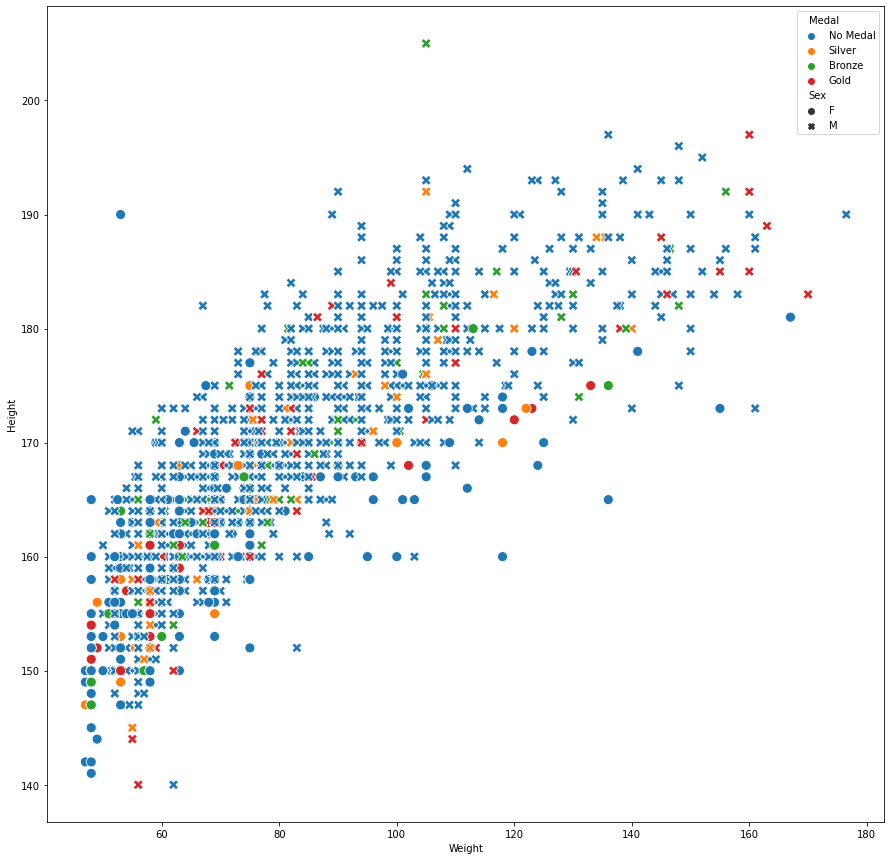

In [77]:
plt.figure(figsize=(15,15))
temp_df= athlete_df[athlete_df['Sport']=='Weightlifting']
sns.scatterplot(temp_df['Weight'], temp_df['Height'], hue=temp_df['Medal'], style= temp_df['Sex'], s=100)

In [78]:
men= athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()

In [79]:
men

Year  Name
0   1896   174
1   1900  1181
2   1904   629
3   1906   759
4   1908  1772
5   1912  1978
6   1920  2280
7   1924  2535
8   1928  2342
9   1932  1382
10  1936  3539
11  1948  3629
12  1952  3468
13  1956  2193
14  1960  3755
15  1964  3290
16  1968  3555
17  1972  4552
18  1976  3320
19  1980  3151
20  1984  4299
21  1988  4704
22  1992  4769
23  1996  4811
24  2000  4294
25  2004  3931
26  2008  3990
27  2012  3679
28  2016  4022

In [81]:
women = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [82]:
women

Year  Name
0   1900    23
1   1904     6
2   1906     6
3   1908    44
4   1912    53
5   1920    73
6   1924   132
7   1928   285
8   1932   162
9   1936   316
10  1948   420
11  1952   409
12  1956   288
13  1960   473
14  1964   507
15  1968   599
16  1972   818
17  1976  1028
18  1980   875
19  1984  1368
20  1988  1734
21  1992  2080
22  1996  2518
23  2000  2790
24  2004  2820
25  2008  2947
26  2012  2919
27  2016  3209

In [85]:
final = men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x':'Male', 'Name_y':'Female'}, inplace=True)
final.fillna(0, inplace=True)

In [86]:
final

Year  Male  Female
0   1896   174     0.0
1   1900  1181    23.0
2   1904   629     6.0
3   1906   759     6.0
4   1908  1772    44.0
5   1912  1978    53.0
6   1920  2280    73.0
7   1924  2535   132.0
8   1928  2342   285.0
9   1932  1382   162.0
10  1936  3539   316.0
11  1948  3629   420.0
12  1952  3468   409.0
13  1956  2193   288.0
14  1960  3755   473.0
15  1964  3290   507.0
16  1968  3555   599.0
17  1972  4552   818.0
18  1976  3320  1028.0
19  1980  3151   875.0
20  1984  4299  1368.0
21  1988  4704  1734.0
22  1992  4769  2080.0
23  1996  4811  2518.0
24  2000  4294  2790.0
25  2004  3931  2820.0
26  2008  3990  2947.0
27  2012  3679  2919.0
28  2016  4022  3209.0

In [87]:
fig = px.line(final, x='Year', y=['Male','Female'])
fig.show()